# Julian Oolman

#### Table of Contents

* [Overview](#Overview)

# Overview

Here is a demonstration of wrangling and cleaning a data set from the raw downloaded file to a pickle.

In [1]:
import pandas as pd
import numpy as np

In [2]:
gm = pd.read_csv('C:/Users/johnj/Documents/Data/aml in econ 02 spring 2021/gapminder.csv')
gm.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


In [3]:
gm.columns

Index(['continent', 'country', 'gdpPercap_1952', 'gdpPercap_1957',
       'gdpPercap_1962', 'gdpPercap_1967', 'gdpPercap_1972', 'gdpPercap_1977',
       'gdpPercap_1982', 'gdpPercap_1987', 'gdpPercap_1992', 'gdpPercap_1997',
       'gdpPercap_2002', 'gdpPercap_2007', 'lifeExp_1952', 'lifeExp_1957',
       'lifeExp_1962', 'lifeExp_1967', 'lifeExp_1972', 'lifeExp_1977',
       'lifeExp_1982', 'lifeExp_1987', 'lifeExp_1992', 'lifeExp_1997',
       'lifeExp_2002', 'lifeExp_2007', 'pop_1952', 'pop_1957', 'pop_1962',
       'pop_1967', 'pop_1972', 'pop_1977', 'pop_1982', 'pop_1987', 'pop_1992',
       'pop_1997', 'pop_2002', 'pop_2007'],
      dtype='object')

`pd.wide_to_long()` automatically creates hiearchical indices.
To remove them, chain `.reset_index()`.

In [4]:
df = pd.wide_to_long(gm, stubnames = ['gdpPercap_', 'lifeExp_', 'pop_'],
                     i = ['continent', 'country'],
                     j = 'year').rename(columns = {'gdpPercap_': 'gdpPercap',
                                                   'lifeExp_': 'lifeExp',
                                                   'pop_': 'pop'})
df_j = df.copy()
df.head()

gdpPercap  lifeExp         pop
continent country year                                  
Africa    Algeria 1952  2449.008185   43.077   9279525.0
                  1957  3013.976023   45.685  10270856.0
                  1962  2550.816880   48.303  11000948.0
                  1967  3246.991771   51.407  12760499.0
                  1972  4182.663766   54.518  14760787.0

In [5]:
df.to_pickle('C:/Users/johnj/Documents/Data/aml in econ 02 spring 2021/ml_data.pkl')

# Plotting

For the love of god use seaborn when possible

***

In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', titlesize=24)
mpl.rc('axes', labelsize=20)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize = (8, 4.5))

from scipy.stats import binned_statistic

# Alternatively with seaborn....
sns.set(rc = {'axes.titlesize': 24,
             'axes.labelsize': 20,
             'xtick.labelsize': 12,
             'ytick.labelsize': 12,
             'figure.figsize': (8, 4.5)})
# sns.set_palette("viridis")

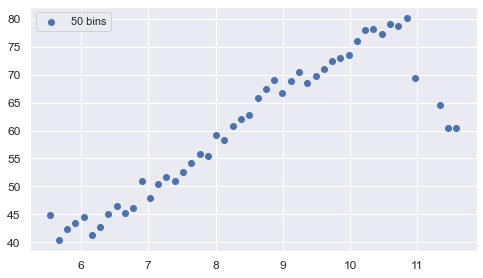

In [7]:
n = 50
bin_mean, bin_edge, bin_number = binned_statistic(np.log(df.gdpPercap), df.lifeExp, bins = n)

df2 = df.reset_index()

x = np.average([bin_edge[:-1], bin_edge[1:]], axis = 0)

plt.figure()
plt.scatter(x, bin_mean, label = '%d bins' % n)
#plt.errorbar(x, bin_mean, yerr = bin_std, capsize = 10)
plt.legend()
plt.show()

In [8]:
df.head()

gdpPercap  lifeExp         pop
continent country year                                  
Africa    Algeria 1952  2449.008185   43.077   9279525.0
                  1957  3013.976023   45.685  10270856.0
                  1962  2550.816880   48.303  11000948.0
                  1967  3246.991771   51.407  12760499.0
                  1972  4182.663766   54.518  14760787.0

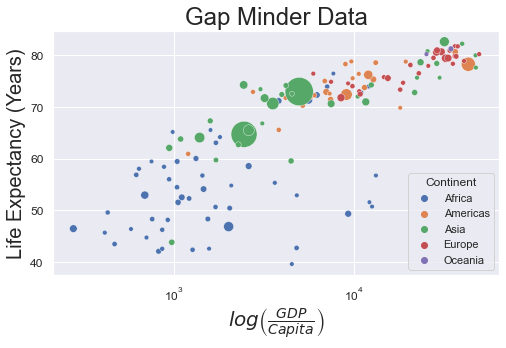

In [9]:
df_2007 = df.reorder_levels([2, 1, 0]).loc[2007]

fig = sns.scatterplot(x = 'gdpPercap', y = 'lifeExp', data = df_2007, hue = 'continent', size = 'pop', sizes = (20, 800))
h, l = fig.get_legend_handles_labels()

plt.legend(h[1:6], l[1:6], loc = 'lower right', title = 'Continent')

plt.xscale('log')

plt.title('Gap Minder Data')
plt.xlabel(r'$log\left(\frac{GDP}{Capita}\right)$')
plt.ylabel('Life Expectancy (Years)')

plt.show()

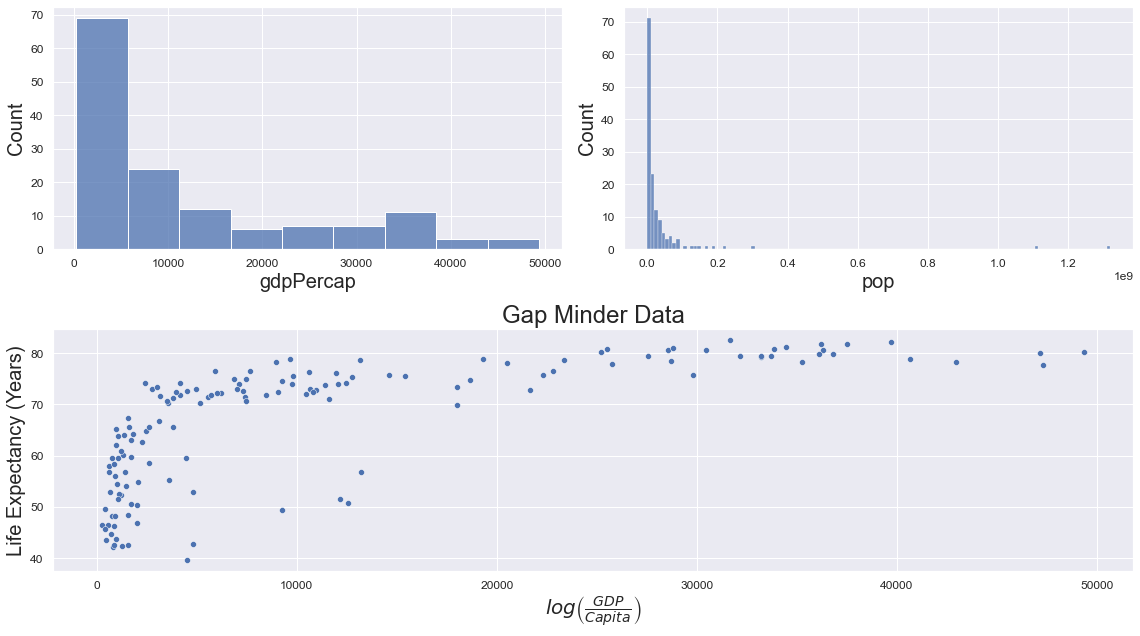

In [10]:
plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
sns.histplot(data = df_2007, x = 'gdpPercap')

plt.subplot(2,2,2)
sns.histplot(data = df_2007, x = 'pop')

plt.subplot(2,1,2)
sns.scatterplot(data = df_2007, x = 'gdpPercap', y = 'lifeExp')
plt.title('Gap Minder Data')
plt.xlabel(r'$log\left(\frac{GDP}{Capita}\right)$')
plt.ylabel('Life Expectancy (Years)')
plt.tight_layout()

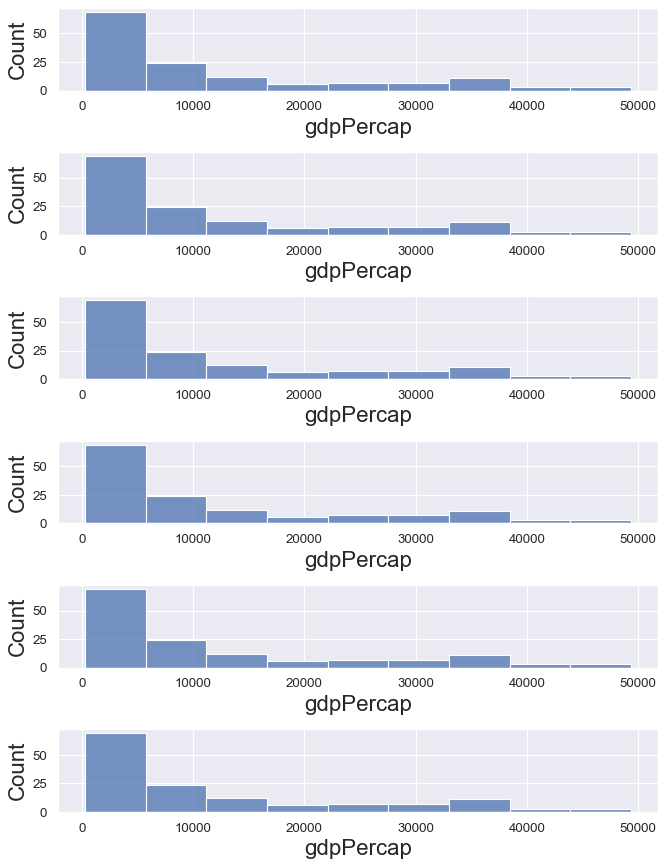

In [11]:
plt.figure(figsize = (8.5,11), dpi = 80)
plt.subplot(6,1,1)
sns.histplot(data = df_2007, x = 'gdpPercap')
plt.subplot(6,1,2)
sns.histplot(data = df_2007, x = 'gdpPercap')
plt.subplot(6,1,3)
sns.histplot(data = df_2007, x = 'gdpPercap')
plt.subplot(6,1,4)
sns.histplot(data = df_2007, x = 'gdpPercap')
plt.subplot(6,1,5)
sns.histplot(data = df_2007, x = 'gdpPercap')
plt.subplot(6,1,6)
sns.histplot(data = df_2007, x = 'gdpPercap')
plt.tight_layout()

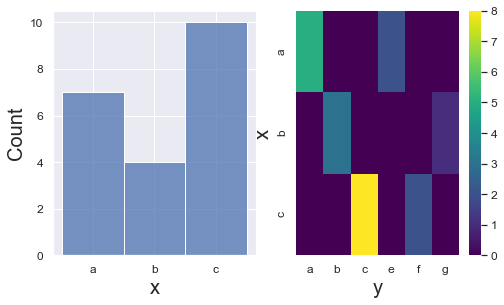

In [12]:
df_test = pd.DataFrame({'x': list('aaaaaaabbbbcccccccccc'),
                       'y': list('eeaaaaabbgbccccccffcc')})

plt.figure()
plt.subplot(1,2,1)
sns.histplot(data = df_test, x = 'x')

plt.subplot(1,2,2)
df_heatmap = pd.crosstab(df_test.x, df_test.y)
sns.heatmap(data = df_heatmap, cmap = 'viridis')
plt.show()

In [13]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info

In [15]:
import pandas_datareader.data as web
nasdaq = pd.DataFrame(web.get_data_yahoo('^IXIC', start = '1971-02-04'))
backup = nasdaq.copy()

In [ ]:
print(nasdaq.shape)
nasdaq.head()

In [ ]:
nasdaq = backup.copy()
nasdaq.reset_index(inplace = True)
nasdaq['date'] = pd.to_datetime(nasdaq['Date'])
nasdaq = nasdaq.set_index('date').drop(['Date'], axis = 1).asfreq(freq = 'D')
print(nasdaq.head())

nasdaq = nasdaq[['Close']].rename(columns = {'Close': 'y'})
nasdaq['ly'] = np.log(nasdaq['y'])
nasdaq['dly'] = nasdaq.ly.diff()
nasdaq
# nasdaq['y_lag1'] = nasdaq['y'].shift(-1)

In [ ]:
df = nasdaq.reset_index()

plt.figure(figsize = (12,6))
plt.subplot(1, 3, 1)
sns.lineplot(data = nasdaq, x = nasdaq.index, y = 'y')

plt.subplot(1, 3, 2)
sns.lineplot(data = df, x = df['date'], y = 'ly')

plt.subplot(1, 3, 3)
sns.lineplot(data = df, x = df['date'], y = 'dly')

plt.tight_layout()

In [ ]:
nasdaq['dly_lag1'] = nasdaq.dly.shift(-1)
nasdaq.dropna()

In [ ]:
df = df_2007.reset_index().set_index('country')
df['lgdpPercap'] = np.log(df.gdpPercap)
df['llifeExp'] = np.log(df.lifeExp)
df['lpop'] = np.log(df['pop'])
df.drop(columns = ['gdpPercap', 'lifeExp', 'pop'], inplace = True)
df.head()

In [ ]:
sns.pairplot(df)#, kind = 'hist')
plt.show()

In [ ]:
sns.violinplot(data = df, x = 'continent', y = 'lgdpPercap')

In [ ]:
df2 = df.append([df, df, df, df, df, df, df, df, df, df, df, df, df, df, df, df, df, df, df, df, df, df, df, df, df, df])
df2 = df.append([df2, df2, df2, df2, df2, df2, df2, df2, df2, df2, df2, df2, df2, df2, df2, df2])
df2

sns.pairplot(df2, kind = 'hist', plot_kws = {'bins': 10}, diag_kws = {'bins': 10})

In [ ]:
df_2007.describe()

***
# Taking a look at Cross-Validation for the Inference section
***

In [ ]:
df.head()

In [ ]:
df['y'] = df.continent.str.startswith('A')*1
df

In [ ]:
x = df.drop(columns = ['y', 'continent'])
print(x.shape)
y = df['y']
y.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter = 1e3, random_state = 117, C = 1e-2)
lr.fit(x, y)
lr.coef_

In [ ]:
param_grid = [
    {'C': 10**np.linspace(-3, 2, num = 20)}
]

lr_cv = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter = 1e3, random_state = 117)

grid_search = GridSearchCV(lr_cv, param_grid, cv = 7,
                        scoring = 'accuracy')
grid_search.fit(x, y)
best = grid_search.best_params_['C']
best

In [ ]:
from statsmodels.formula.api import logit

lmod = logit(formula = 'y ~ lgdpPercap + llifeExp + lpop', data = df).fit_regularized(alpha = best)
lmod.summary()

In [ ]:
lmod_final = logit(formula = 'y ~ lpop', data = df).fit()
lmod_final.summary()

In [ ]:
lmod_final.params[1]

In [ ]:
lmod_final.get_margeff().summary()

In [ ]:
from statsmodels.formula.api import mnlogit 

In [ ]:
# mnlogit(formula = 'continent ~ lgdpPercap + llifeExp + lpop', data = df)

In [ ]:
import statsmodels.api as sm
y = df.continent
y.head(3)

In [ ]:
x = sm.add_constant(df[['lgdpPercap', 'llifeExp', 'lpop']])
x.head(3)

In [ ]:
mdl = sm.MNLogit(y, x).fit()
print(np.unique(y))
print(mdl.summary())

In [ ]:
print(mdl.get_margeff().summary())

In [ ]:
mdl2 = sm.MNLogit(y, x).fit_regularized(alpha=0.01, maxiter = 10000)
print(mdl2.summary())

In [ ]:
((100*2) + 60*3)/60

In [ ]:
sfit = lmod_final.summary()
sfit.tables[1].as_latex_tabular()

In [ ]:
from stargazer.stargazer import Stargazer

strgzer = Stargazer([lmod_final])

f = open('myreg.tex', 'w')
f.write(strgzer.render_latex())
f.close()

In [ ]:
lmod2 = logit(formula = 'y ~ lgdpPercap + llifeExp + lpop', data = df).fit()

f = open('myreg2.text', 'w')
f.write(Stargazer([lmod2, lmod]).render_latex())
f.close()

In [ ]:
data = {'region': list('abab'),
       'year': [1, 2, 1, 2],
       'v1': np.random.rand(4),
       'v2': np.random.poisson(size = 4),
       'v3': np.random.rand(4),
       'v4': np.random.normal(size = 4)}
data

In [ ]:
pd.DataFrame(data).set_index(['region','year'])